In [1]:
import sys
import os

import numpy as np

import pyAgrum as gum

%matplotlib inline
from pyAgrum.lib.bn2roc import showROC

In [2]:
bn=gum.loadBN(os.path.join("res","alarm.dsl"))

In [15]:
gum.generateCSV(bn,os.path.join("out","learn.csv"),10000,visible=True,with_labels=True)
print()
gum.generateCSV(bn,os.path.join("out","train.csv"),1000,visible=True,with_labels=True)

 out/learn.csv : [ ########################################################### ] 100%ut/learn.csv : [ ######################################                      ] 64%out/learn.csv : [ ####################################################        ] 88%out/learn.csv : [ #######################################################     ] 94%
Log2-Likelihood : -150627.28542962522

 out/train.csv : [ ########################################################### ] 100%ut/train.csv : [ ##################################################          ] 85%
Log2-Likelihood : -15131.97163224153


-15131.97163224153

# Learning a BN from learn.csv

In [16]:
# Learning a BN from the database
learner=gum.BNLearner(os.path.join("out","train.csv"))

# # Hill-Climbing
learner.useGreedyHillClimbing()
bn2=learner.learnBN()
bn2.setProperty("name","Learned_{0}s".format(learner.currentTime()))

In [17]:
import pyAgrum.lib.notebook as gnb
gnb.showBN(bn2,size="8",format="svg")

In [18]:
print(bn2.names())

['PRESS', 'KINKEDTUBE', 'INSUFFANESTH', 'PAP', 'VENTMACH', 'FIO2', 'ERRCAUTER', 'HREKG', 'ERRLOWOUTPUT', 'CVP', 'VENTTUBE', 'STROKEVOLUME', 'HRBP', 'VENTLUNG', 'LVEDVOLUME', 'PVSAT', 'HYPOVOLEMIA', 'PULMEMBOLUS', 'MINVOLSET', 'TPR', 'SHUNT', 'MINVOL', 'ANAPHYLAXIS', 'LVFAILURE', 'HRSAT', 'BP', 'DISCONNECT', 'CO', 'CATECHOL', 'INTUBATION', 'EXPCO2', 'SAO2', 'HISTORY', 'VENTALV', 'ARTCO2', 'PCWP', 'HR']


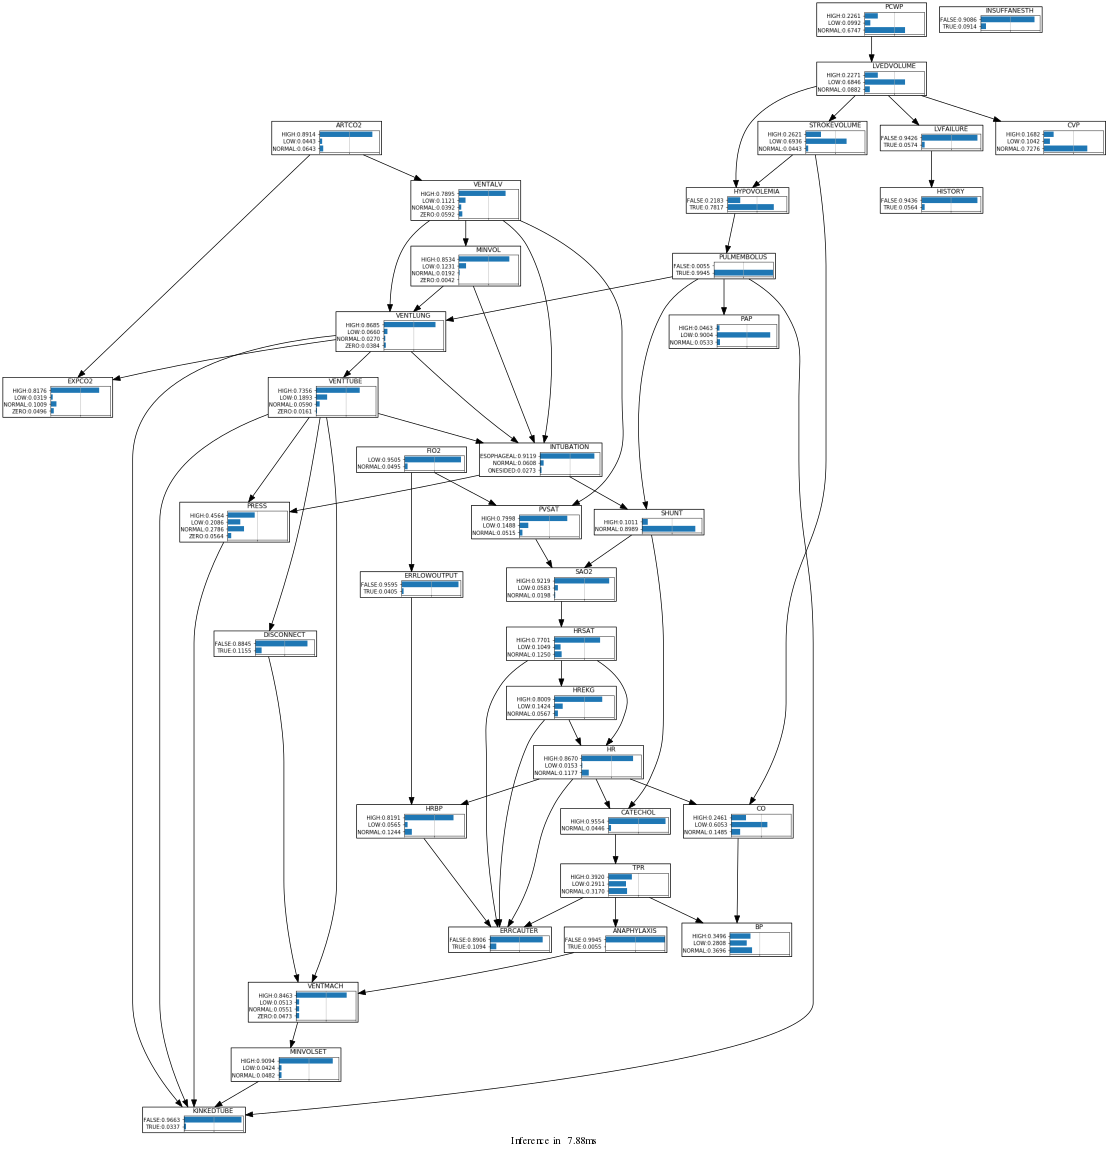

In [19]:
gnb.showInference(bn2,evs={},size="12")

# Two classifiers from the learned BN

In [20]:
print(bn2.variableFromName("HRSAT"))
print(bn2.variableFromName("INTUBATION"))

HRSAT<HIGH,LOW,NORMAL>
INTUBATION<ESOPHAGEAL,NORMAL,ONESIDED>



 result in out/train.csv-ROC_Learned_0.436804546s-HRSAT-LOW.png


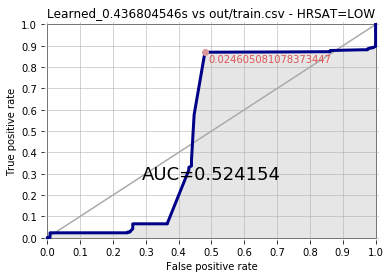

In [22]:
showROC(bn2,os.path.join("out","train.csv"),'HRSAT','LOW',visible=False) 


 result in out/train.csv-ROC_Learned_0.436804546s-INTUBATION-NORMAL.png


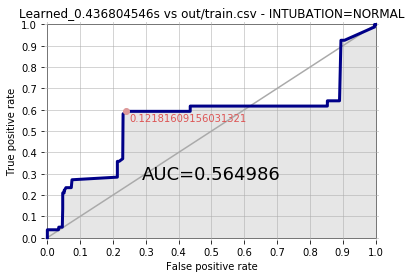

In [23]:
showROC(bn2,os.path.join("out","train.csv"),'INTUBATION',"NORMAL",visible=False) 